<a href="https://colab.research.google.com/github/Deli8t/data/blob/master/Delight_Assignmet_Imbalanced_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Notebook -Imbalanced Classification Project




# Background Information
**Problem Statement**
Beta Bank customers are leaving: little by little, chipping away every month. The bankers
figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on
clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1
score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.
1. Download and prepare the data. Explain the procedure.
2. Examine the balance of classes. Train the model without taking into account the
imbalance. Briefly describe your findings.
3. Improve the quality of the model. Make sure you use at least two approaches to
fixing class imbalance. Use the training set to pick the best parameters. Train
different models on training and validation sets. Find the best one. Briefly
describe your findings.
4. Perform the final testing.

**Data Description**

●Dataset URL (CSV File): https://bit.ly/2XZK7Bo

# 1.Data Exploration

In [ ]:
#We will now import  libraries we require  to read our csv file 
# from an external  source. 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from joblib import dump
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

churn_df = pd.read_csv("/content/Churn (1).csv")
                 
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
#check data format and nulls
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB




*   There are missing values in the Tenure column; 9091/10000



In [ ]:
#count Nulls in Tenure
churn_df['Tenure'].isnull().sum()

909

In [ ]:
#Replace missing values with average tenure.
tenure_avg = churn_df['Tenure'].mean()
tenure_avg

4.997690023099769

In [ ]:
churn_df['Tenure'] = churn_df['Tenure'].fillna(value = tenure_avg)

In [ ]:
churn_df['Tenure'].isnull().sum()

0

In [ ]:
#convert Tenure to integers
churn_df['Tenure'] = churn_df['Tenure'].astype(int)

In [ ]:
#Checking the size of a dataset
churn_df.shape

(10000, 14)

In [ ]:
#checking for null values
churn_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#drop Row number and Customer ID &Surname
churn_df = churn_df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [ ]:
churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Quick check to see if the values got filled:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#2.Data Preparation

In [ ]:
#Splitting of data
scaler = StandardScaler() 

#OHE (One Hot Encoding)
churn_df = pd.get_dummies(churn_df, drop_first=True)

#creating a features dataframe and a target dataframe
features = churn_df.drop(columns=['Exited'])
target =  churn_df['Exited']

#We will split the data into training, testing and validation sets. Of the base dataset,
#We will split 20% for testing and 80% for training.
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=12345)
features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train, test_size=0.2, random_state=12345 )

In [ ]:
#Standardizing the numeric columns tohelp our evaluation metrics.
to_normalize = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
scaler = StandardScaler()
scaler.fit(features_train[to_normalize])
features_train.loc[:,to_normalize] = scaler.transform(features_train[to_normalize])
features_valid.loc[:,to_normalize] = scaler.transform(features_valid[to_normalize])
features_test.loc[:,to_normalize] = scaler.transform(features_test[to_normalize])

In [ ]:
#First, let's look at the class imbalance (if there is any) briefly:
print(churn_df[churn_df['Exited'] == 1]['Exited'].count())
print(churn_df[churn_df['Exited'] == 0]['Exited'].count())

2037
7963


# 3.Data Modeling

In [ ]:
#Examine the balance of classes. Train the model without taking into account the imbalance.
#LogisticRegression

LogRegModImb = LogisticRegression(solver='liblinear', random_state=12345)
LogRegModImb.fit(features_train,target_train)
print('Accuracy', LogRegModImb.score(features_valid, target_valid))
print('f1 score:' ,f1_score(target_valid, LogRegModImb.predict(features_valid)))


Accuracy 0.8175
f1 score: 0.3145539906103286


In [ ]:
#Now balance the data and see how the logistic regression improves.
LogRegModBal = LogisticRegression(solver='liblinear', random_state=12345, class_weight='balanced')
LogRegModBal.fit(features_train,target_train)
print('Accuracy', LogRegModBal.score(features_valid, target_valid))
print('f1 score:' ,f1_score(target_valid, LogRegModBal.predict(features_valid)))


Accuracy 0.70875
f1 score: 0.46924829157175396


We have a accuracy of 0.70, f1 score of 0.47, and AUC of 0.77 when we do account for imbalance and use logistic regression. The accuracy has gone down from balancing but the f1 score has improved.

In [ ]:
##Upsampling function 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

upsampled_LogReg_model =LogisticRegression(random_state=12345,solver='liblinear')
upsampled_LogReg_model.fit(features_upsampled, target_upsampled)
upsampled_LogReg_predicted_valid = upsampled_LogReg_model.predict(features_valid)


print('Accuracy', upsampled_LogReg_model.score(features_valid, target_valid))
print('f1 score:' ,f1_score(target_valid, upsampled_LogReg_predicted_valid))
print('AUC:',roc_auc_score(target_valid, upsampled_LogReg_model.predict_proba(features_valid)[:,1]))

Accuracy 0.454375
f1 score: 0.39332870048644897
AUC: 0.7678598237618673


In [ ]:
#Downsampling function 
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

down_LogReg_model =LogisticRegression(random_state=12345,solver='liblinear')
down_LogReg_model.fit(features_downsampled, target_downsampled)
down_LogReg_predicted_valid = down_LogReg_model.predict(features_valid)

print("F1:", f1_score(target_valid, down_LogReg_predicted_valid))
print('Accuracy:', down_LogReg_model.score(features_valid, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, down_LogReg_model.predict_proba(features_valid)[:,1]))

F1: 0.39145416953824946
Accuracy: 0.448125
AUC-ROC: 0.7647757836693462


In [ ]:
#DeciscionTreeClassifier

depth_param = {'max_depth':range(1,25)}
DecTreeMod = DecisionTreeClassifier(random_state=12345)
DecTreeModOpt = GridSearchCV(DecTreeMod,depth_param)
DecTreeModOpt.fit(features_train, target_train)
print(DecTreeModOpt.best_estimator_)
DecTreeModOpt_predicted_valid = DecTreeModOpt.predict(features_valid)

print("F1:", f1_score(target_valid, DecTreeModOpt_predicted_valid))
print('Accuracy:', DecTreeModOpt.score(features_valid, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, DecTreeModOpt.predict_proba(features_valid)[:,1]))

DecisionTreeClassifier(max_depth=6, random_state=12345)
F1: 0.5176991150442477
Accuracy: 0.86375
AUC-ROC: 0.8132692606191999


In [ ]:
#RandomForest

depth_param = {'max_depth':range(1,10), 'n_estimators':range(1,50)}
RandForestMod = RandomForestClassifier(random_state=12345)
RandForestOpt = GridSearchCV(RandForestMod,depth_param)
RandForestOpt.fit(features_train, target_train)
print(RandForestOpt.best_estimator_)
RandForestOpt_predicted_valid = RandForestOpt.predict(features_valid)

print("F1:", f1_score(target_valid, RandForestOpt_predicted_valid))
print('Accuracy', RandForestOpt.score(features_valid, target_valid))
print("AUC-ROC:", roc_auc_score(target_valid, RandForestOpt.predict_proba(features_valid)[:,1]))

RandomForestClassifier(max_depth=8, n_estimators=40, random_state=12345)
F1: 0.5431578947368422
Accuracy 0.864375
AUC-ROC: 0.8501874088719589


# 4.Summary of Findings and Recommendations

Random forests gives us a f1 score of 0.54.  We need an f1 score of at least 0.59, it is the right model for the job


# 5.Imbalanced Classification

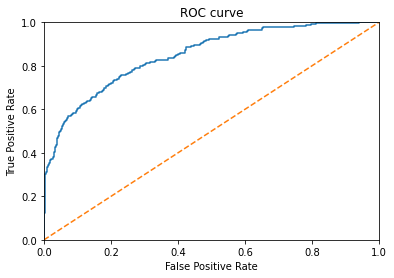

In [ ]:
#Plotting  the AUC-ROC curve.

probabilities_valid = RandForestOpt.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

We see a deviation from the random model (orange line) that shows that our model performs much better . This is validated by the AUC we calculated.

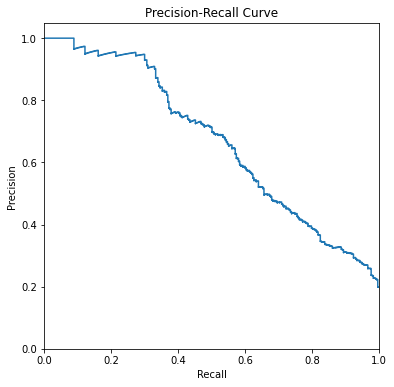

In [ ]:
#Let's plot the precision-recall curve

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show() 

The precision-recall curve is very high, which also signifies a high performance of the model. 